In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
def splitDatasets(data, mapping, state = 0, return_bool = False):
    family_ids = mapping.familyID.values
    train, test = train_test_split(list(set(family_ids)), test_size = .4, random_state = state)
    test, val = train_test_split(test, test_size = .5, random_state = state)
    
    train_bool = [i in train for i in family_ids]
    val_bool = [i in val for i in family_ids]
    test_bool = [i in test for i in family_ids]
    
    x_train = data.loc[train_bool, :]
    x_val = data.loc[val_bool, :]
    x_test = data.loc[test_bool, :]

    #print((x_train.shape[0] + x_val.shape[0] + x_test.shape[0]) == data.shape[0])
    if return_bool == False:
        return(x_train, x_val, x_test)
    else:
        return(train_bool, val_bool, test_bool)

In [3]:
def matchDatasets(data1_tab, data1_map, data2_tab, data2_map, dir_name):
    samples_keep = set(data1_tab.index.values) & set(data2_tab.index.values)
    data2_map_matched = data2_map.loc[samples_keep, :]
    data2_tab_matched = data2_tab.loc[samples_keep, :]
    data1_map_matched = data1_map.loc[samples_keep, :]
    data1_tab_matched = data1_tab.loc[samples_keep, :]
    print(data1_map_matched.shape)
    print("Timepoints matched between datasets")
    print(np.sum([i == j for i,j in zip(data1_map_matched['timepoint'].values, data2_map_matched['timepoint'].values)]) / data1_map_matched.shape[0])

    train_bool, val_bool, test_bool = splitDatasets(data1_tab_matched, data1_map_matched, state = 0, return_bool = True)
    
    data2_tab_train = data2_tab_matched.loc[train_bool, :]
    data2_map_train = data2_map_matched.loc[train_bool, :]
    data2_tab_val = data2_tab_matched.loc[val_bool, :]
    data2_map_val = data2_map_matched.loc[val_bool, :]
    data2_tab_test = data2_tab_matched.loc[test_bool, :]
    data2_map_test = data2_map_matched.loc[test_bool, :]

    data1_tab_train = data1_tab_matched.loc[train_bool, :]
    data1_map_train = data1_map_matched.loc[train_bool, :]
    data1_tab_val = data1_tab_matched.loc[val_bool, :]
    data1_map_val = data1_map_matched.loc[val_bool, :]
    data1_tab_test = data1_tab_matched.loc[test_bool, :]
    data1_map_test = data1_map_matched.loc[test_bool, :]
    
    data1_tab_train.to_csv(dir_name + "/x_train.csv")
    data2_tab_train.to_csv(dir_name +"/y_train.csv")

    data1_tab_val.to_csv(dir_name +"/x_val.csv")
    data2_tab_val.to_csv(dir_name +"/y_val.csv")

    data1_tab_test.to_csv(dir_name +"/x_test.csv")
    data2_tab_test.to_csv(dir_name +"/y_test.csv")

# Match Metabol to MTG in M3 data

In [4]:
mbx_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/metabol/asv_table_nooutliers.txt", sep = "\t", index_col = 0)
mbx_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/metabol/mapping_nooutliers.txt", sep = "\t", index_col = 0)
mbx_tab = mbx_tab.iloc[:, 1:]
mbx_tab = mbx_tab.T

mtg_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtg/asv_table_nooutliers.txt", sep = "\t")
mtg_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtg/mapping_nooutliers.txt", sep = "\t")
mtg_tab = mtg_tab.T
mtg_map.head()
print(mtg_map.shape)

(193, 55)


In [5]:
matchDatasets(mtg_tab, mtg_map, mbx_tab, mbx_map, dir_name = "data/mtg_metabol/")

(91, 55)
Timepoints matched between datasets
0.7802197802197802


# Match Metabol to MTT 

In [6]:
mbx_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/metabol/asv_table_nooutliers.txt", sep = "\t", index_col = 0)
mbx_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/metabol/mapping_nooutliers.txt", sep = "\t", index_col = 0)
mbx_tab = mbx_tab.iloc[:, 1:]
mbx_tab = mbx_tab.T

mtt_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtt/asv_table_nooutliers.txt", sep = "\t")
mtt_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtt/mapping_nooutliers.txt", sep = "\t")
mtt_tab = mtt_tab.T
mtt_map.head()
print(mtt_tab.shape)
matchDatasets(mtt_tab, mtt_map, mbx_tab, mbx_map, dir_name = "data/mtt_metabol/")


(188, 10543)
(89, 55)
Timepoints matched between datasets
0.7752808988764045


10638.513522996333

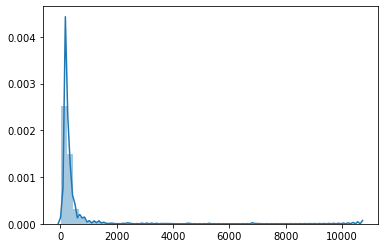

In [7]:
import seaborn as sns
sns.distplot(mbx_tab.sum(axis = 0 ))
mbx_tab.sum(axis = 0 ).max()

# Match Metabol to 16S

In [8]:
mbx_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/metabol/asv_table_nooutliers.txt", sep = "\t", index_col = 0)
mbx_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/metabol/mapping_nooutliers.txt", sep = "\t", index_col = 0)
mbx_tab = mbx_tab.iloc[:, 1:]
mbx_tab = mbx_tab.T
print(mbx_tab.shape)

s_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/16s/asv_table_nooutliers.txt", sep = "\t")
s_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/16s/mapping_nooutliers.txt", sep = "\t")
s_tab = s_tab.T
print(s_map.shape)
s_map.head()

(158, 1221)
(450, 56)


,biospecimen_id,biospecimen_name,host_name,timepoint,familyID,dog,cat,min_time_antibiotics,stool_freq,csection,...,dairy_freq,fat_oil_freq,vegetable_freq,fruit_freq,father_age,mother_age,recently_ill,MARA,date,phenotype
M3_001_P1_A_V1,B18011967,M3_001_P1_A_V1,001_A,Timepoint 1,1,False,False,3.0,1,True,...,3.0,0.0,0.0,0.0,480,451,False,-3.531,2017-12-18,A
M3_001_P1_N_V1,B18011968,M3_001_P1_N_V1,001_N,Timepoint 1,1,False,False,3.0,2,True,...,1.0,1.0,0.0,3.0,480,451,False,NaN,2017-12-19,N
M3_001_P2_A_V1,B18011969,M3_001_P2_A_V1,001_A,Timepoint 2,1,False,False,3.0,1,True,...,3.0,0.0,0.0,0.0,480,451,False,-3.531,2017-12-26,A
M3_001_P2_N_V1,B18011970,M3_001_P2_N_V1,001_N,Timepoint 2,1,False,False,3.0,2,True,...,1.0,1.0,1.0,3.0,480,451,True,NaN,2017-12-30,N
M3_001_P3_A_V1,B18011971,M3_001_P3_A_V1,001_A,Timepoint 3,1,False,False,3.0,1,True,...,1.0,0.0,0.0,0.0,480,451,False,-3.531,2018-01-05,A


In [9]:
metabolome_map = pd.read_csv("../../data/metabol/M3_metabolome_meta_data.csv", index_col = 1)
metabolome_map = pd.DataFrame(metabolome_map)
metabolome_map.index.values
[i in metabolome_map.index.values for i in mbx_map.biospecimen_id.values]
metabolome_map = metabolome_map.loc[mbx_map.biospecimen_id.values, :]
metabolome_map.head()

,SG.Project.ID,Host.ID,Host.Name,Biospecimen.ID,Biospecimen.Name,Biospecimen.Description,Biospecimen.mass,Biospecimen.mass.unit,Biospecimen.Date.Collected,Within.study.sampling.date,...,Donor.individual.included.in.present.study,Days.since.beginning.treatment,Changed.diet.or.medications.during.or.after.treatment..Kang.,Dietary.or.medication.changes.during.or.after.treatment..Kang.,Semantic.Pragmatic.Problems..SEMPP..score..PDD.BI.,Arousal.Regulation.Problems..AROUSE..score..PDD.BI.,Specific.Fears..FEARS..score..PDD.BI.,Aggressiveness..AGG..score..PDD.BI.,Learning..Memory..and.Receptive.Language..LMRL..score..PDD.BI.,Stool.immunoglobulin.A..observation.
Biospecimen.Barcode,,,,,,,,,,,,,,,,,,,,,
B18011782,SG_SIwai_INRD17_0415,9514,038_N,152383,M3_038_F1_N_V1,NaN,NaN,NaN,NaN,Timepoint 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B18011738,SG_SIwai_INRD17_0415,9352,001_A,152168,M3_001_F1_A_V1,NaN,NaN,NaN,NaN,Timepoint 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B18011739,SG_SIwai_INRD17_0415,9477,001_N,152169,M3_001_F1_N_V1,NaN,NaN,NaN,NaN,Timepoint 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B18011752,SG_SIwai_INRD17_0415,9362,011_A,152238,M3_011_F1_A_V1,NaN,NaN,NaN,NaN,Timepoint 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B18011753,SG_SIwai_INRD17_0415,9487,011_N,152239,M3_011_F1_N_V1,NaN,NaN,NaN,NaN,Timepoint 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
s_map_new = pd.DataFrame()
for i in np.arange(0, metabolome_map.shape[0]):
    host_name = metabolome_map['Host.Name'].values[i]
    timepoint = metabolome_map['Within.study.sampling.date'].values[i]
    s_tmp = s_map.loc[s_map.host_name.values == host_name, :]
    keep_16s = s_tmp.loc[s_tmp.timepoint.values == timepoint, :]
    s_map_new = s_map_new.append(keep_16s, ignore_index = True)
s_map_new.index = s_map_new.biospecimen_name
s_tab = s_tab.loc[s_map_new.index.values, :]
s_map_new.head()

,biospecimen_id,biospecimen_name,host_name,timepoint,familyID,dog,cat,min_time_antibiotics,stool_freq,csection,...,dairy_freq,fat_oil_freq,vegetable_freq,fruit_freq,father_age,mother_age,recently_ill,MARA,date,phenotype
biospecimen_name,,,,,,,,,,,,,,,,,,,,,
M3_001_P1_A_V1,B18011967,M3_001_P1_A_V1,001_A,Timepoint 1,1,False,False,3.0,1,True,...,3.0,0.0,0.0,0.0,480,451,False,-3.531,2017-12-18,A
M3_001_P1_N_V1,B18011968,M3_001_P1_N_V1,001_N,Timepoint 1,1,False,False,3.0,2,True,...,1.0,1.0,0.0,3.0,480,451,False,NaN,2017-12-19,N
M3_011_P3_A_V1,B18012013,M3_011_P3_A_V1,011_A,Timepoint 1,11,False,False,3.0,1,False,...,3.0,3.0,3.0,4.0,593,581,False,-8.117,2017-12-18,A
M3_011_P3_N_V1,B18012014,M3_011_P3_N_V1,011_N,Timepoint 1,11,False,False,3.0,1,False,...,4.0,0.0,3.0,4.0,593,581,False,NaN,2017-12-18,N
M3_054_P2_A_V1,B18012179,M3_054_P2_A_V1,054_A,Timepoint 1,54,False,True,3.0,2,False,...,0.0,4.0,3.0,3.0,490,457,False,-7.683,2017-12-20,A


In [11]:
matchDatasets(s_tab, s_map, mbx_tab, mbx_map, dir_name = "data/16s_metabol/")

(64, 56)
Timepoints matched between datasets
1.0


# Match 16s to MTG

In [12]:
s_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/16s/asv_table_nooutliers.txt", sep = "\t")
s_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/16s/mapping_nooutliers.txt", sep = "\t")
s_tab = s_tab.T

mtg_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtg/asv_table_nooutliers.txt", sep = "\t")
mtg_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtg/mapping_nooutliers.txt", sep = "\t")
mtg_tab = mtg_tab.T

In [13]:
matchDatasets(mtg_tab, mtg_map, s_tab, s_map, dir_name = "data/mtg_16s/")

(153, 55)
Timepoints matched between datasets
1.0


# Match 16s to MTT

In [14]:
s_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/16s/asv_table_nooutliers.txt", sep = "\t")
s_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/16s/mapping_nooutliers.txt", sep = "\t")
s_tab = s_tab.T

mtt_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtt/asv_table_nooutliers.txt", sep = "\t")
mtt_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtt/mapping_nooutliers.txt", sep = "\t")
mtt_tab = mtt_tab.T

In [15]:
matchDatasets(mtt_tab, mtt_map, s_tab, s_map, dir_name = "data/mtt_16s/")

(149, 55)
Timepoints matched between datasets
1.0


In [19]:
def writeDatasets(data, mapping, dir_name):
    train_bool, val_bool, test_bool = splitDatasets(data, mapping, state = 0, return_bool = True)
    data.loc[train_bool, :].to_csv(dir_name + "/x_train.csv")
    data.loc[val_bool, :].to_csv(dir_name +"/x_val.csv")
    data.loc[test_bool, :].to_csv(dir_name +"/x_test.csv")


In [30]:
s_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/16s/asv_table_nooutliers.txt", sep = "\t")
s_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/16s/mapping_nooutliers.txt", sep = "\t")
s_tab = s_tab.T
writeDatasets(s_tab, s_map, "data/16s/")

In [21]:
mtg_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtg/asv_table_nooutliers.txt", sep = "\t")
mtg_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtg/mapping_nooutliers.txt", sep = "\t")
mtg_tab = mtg_tab.T
writeDatasets(mtg_tab, mtg_map, "data/mtg/")

In [28]:
mtt_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtt/asv_table_nooutliers.txt", sep = "\t")
mtt_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/mtt/mapping_nooutliers.txt", sep = "\t")
mtt_tab = mtt_tab.T
writeDatasets(mtt_tab, mtt_map, "data/mtt/")

In [29]:
mbx_tab = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/metabol/asv_table_nooutliers.txt", sep = "\t", index_col = 0)
mbx_map = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/metabol/mapping_nooutliers.txt", sep = "\t", index_col = 0)
#mbx_tab = mbx_tab.iloc[:, 1:]
mbx_tab = mbx_tab.T
writeDatasets(mbx_tab, mbx_map, "data/metabol/")

# Set up to use T2D for autoencoding

In [70]:
t2d_tab = pd.read_csv('data/asv_tab_T2D.txt', index_col = 0, sep = "\t")

In [16]:
s = pd.read_csv("C:/Users/ctata/Documents/Lab/multiomics/data/16s/asv_table_nooutliers.txt", sep = "\t")
tax_table = pd.read_csv('../../data/16s/tax_table.txt', sep = '\t')
s.index = tax_table.Sequence

In [73]:
print(len(s.index.values[0]))
print(len(t2d_tab.columns[0]))

233
522


# Match 16s and MTG